In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import locale
locale.setlocale(locale.LC_ALL, '')

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})
mpl.rcParams.update({'mathtext.fontset':'dejavusans'})
mpl.rcParams['axes.formatter.use_locale'] = True
import re


In [2]:
Simbolos = {'Água':'s', 'Glicerina':'o', 'Sacarose':'<', 'Ureia':'>', '1,3BD':'v', 'DMSO':'^'}
def_markersize = 8
dict_nomes = {'13BD':'1,3BD',
             'Agua':'Água',
             'DMSO':'DMSO',
             'Glic':'Glicerina',
             'Sac':'Sacarose',
             'Ur':'Ureia'}
simbolos_mpl = ['o', '<', '>', '^', 'v', 'd', '*', 'p', '+', 'h', 'D', 'D']
simbolos_conc = {conc:simb for conc, simb in zip(np.arange(5, 65, 5), simbolos_mpl)}
simbolos_conc[0] = 's'
simbolos_conc[1] = 's'
simbolos_conc

{5: 'o',
 10: '<',
 15: '>',
 20: '^',
 25: 'v',
 30: 'd',
 35: '*',
 40: 'p',
 45: '+',
 50: 'h',
 55: 'D',
 60: 'D',
 0: 's',
 1: 's'}

In [3]:
dados = pd.read_excel('ITCs MG.xlsx', header=3)

Xts_nomes = dados.columns[::2].tolist()
DHs_nomes = dados.columns[1::2].tolist()

def find_conc(string):
    re_conc = re.compile(r'(\d?\d)p')
    conc = re_conc.search(string)
    if conc:
        conc = conc.group(1).zfill(2)
    elif conc == 0:
        conc = '100'
    else:
        conc = '100'
    return conc

def find_comp(string):
    return re.search(r'p([a-zA-Z0-9]+)-?', string).group(1)

def sort_comps(string):
    conc = find_conc(string)
    comp = find_comp(string)
    
    return f'{comp}{conc}'

Xts_nomes.sort(key = sort_comps)
DHs_nomes.sort(key = sort_comps)

Xts = dados[Xts_nomes]
DHs = dados[DHs_nomes]
Xts_nomes

['Xt 5p13BD',
 'Xt 15p13BD',
 'Xt 25p13BD',
 'Xt 5pDMSO',
 'Xt 15pDMSO',
 'Xt 25pDMSO',
 'Xt 0pGlic',
 'Xt 10pGlic',
 'Xt 20pGlic',
 'Xt 30pGlic',
 'Xt 40pGlic',
 'Xt 50pGlic',
 'Xt 50pGlic-2',
 'Xt 60pGlic',
 'Xt 10pSac',
 'Xt 20pSac',
 'Xt 20pSac-2',
 'Xt 30pSac',
 'Xt 40pSac',
 'Xt 50pSac',
 'Xt 1pUr',
 'Xt 5pUr',
 'Xt 15pUr',
 'Xt 20pUr',
 'Xt 25pUr',
 'Xt 35pUr']

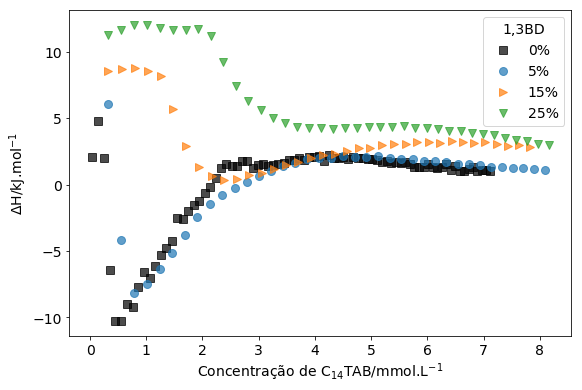

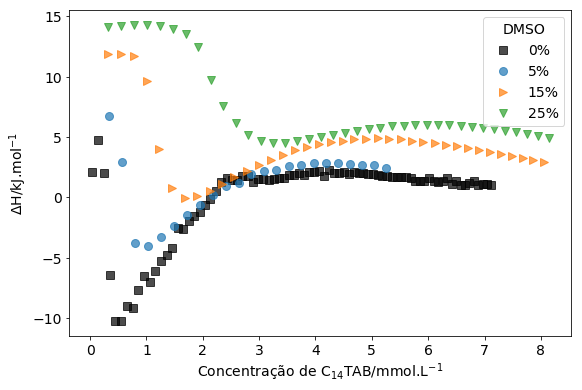

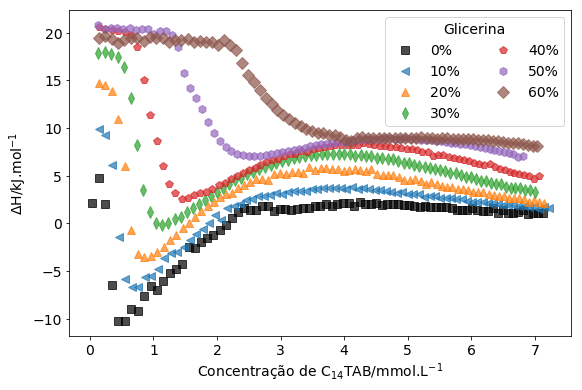

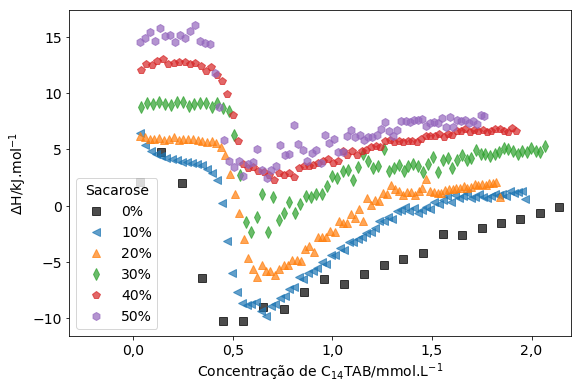

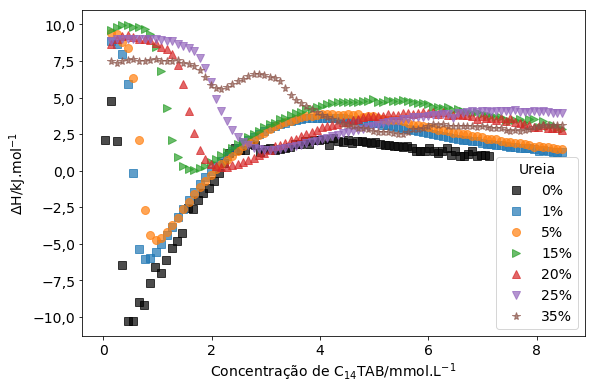

In [5]:
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

fig_13, ax_13 = plt.subplots(1, 1, figsize=(9,6))
fig_dmso, ax_dmso  = plt.subplots(1, 1, figsize=(9,6))
fig_glic, ax_glic  = plt.subplots(1, 1, figsize=(9,6))
fig_sac, ax_sac = plt.subplots(1, 1, figsize=(9,6))
fig_ur, ax_ur  = plt.subplots(1, 1, figsize=(9,6))

dict_axes = {'13BD':ax_13, 'DMSO':ax_dmso, 'Glic':ax_glic, 'Sac':ax_sac, 'Ur':ax_ur}

for ax in dict_axes.values():
    ax.plot(Xts['Xt 0pGlic'], DHs['DH 0pGlic'], label='0%', markersize=def_markersize, linewidth=0,
            marker='s', alpha=0.7, color='k')

for Xt, DH in zip(Xts, DHs):
    if '-2' in Xt:
        continue
    comp = find_comp(Xt)
    conc = int(find_conc(Xt))
    if conc == 0:
        continue
    dict_axes[comp].plot(Xts[Xt][1:], DHs[DH][1:], label=f'{conc}%', 
                         markersize=def_markersize, linewidth=0, marker=simbolos_conc[conc], alpha=0.7)
    
    dict_axes[comp].set(xlabel='Concentração de C$_{14}$TAB/mmol.L$^{-1}$', ylabel='$\Delta$H/kJ.mol$^{-1}$')
    #dict_axes[comp].set_title(dict_nomes[comp], loc='right', fontsize='medium')
    dict_axes[comp].legend(title=dict_nomes[comp])



ax_glic.legend(ncol=2, title='Glicerina')
ax_sac.set_xlim(right=2.2)
figs = [fig_13, fig_dmso, fig_glic, fig_sac, fig_ur]
nomes = ['ITC_MG_13BD.pdf', 'ITC_MG_dmso.pdf', 'ITC_MG_glic.pdf', 'ITC_MG_sac.pdf', 'ITC_MG_ur.pdf']
for fig, nome in zip(figs, nomes):
    fig.savefig(f'../../itc/{nome}')